In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image

In [33]:

def read_file(filename):
    img=cv2.imread(filename)
    #whenever files are read in cv2 they are usually read 
    #into bgr we will convert that into rgb in below line
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

In [37]:
filename="original.jpg"
img=read_file(filename)

org_img=np.copy(img)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (692202237.py, line 1)

# Create edge mask

In [35]:
def edge_mask(img,line_size,blur_value):
    '''
        input:Input image
        output:Edges of Images 
    '''
    #convert image from rgb to gray
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray,blur_value)
    #line_size is thickness of the edges
    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
    return edges

In [36]:
line_size,blur_value=8,8
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap="binary")
plt.show()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\median_blur.dispatch.cpp:285: error: (-215:Assertion failed) (ksize % 2 == 1) && (_src0.dims() <= 2 ) in function 'cv::medianBlur'


# Reduce the Color Palette

In [ ]:
def color_quantization(img,k):
    #Transform the image
    data=np.float32(img).reshape((-1,3))

    #determine the criteria
    criteria=(cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)

    #K-means clustering

    ret, label , center = cv2.kmeans(data,k,None, criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)

    result=center[label.flatten()]
    result=result.reshape(img.shape)

    return result



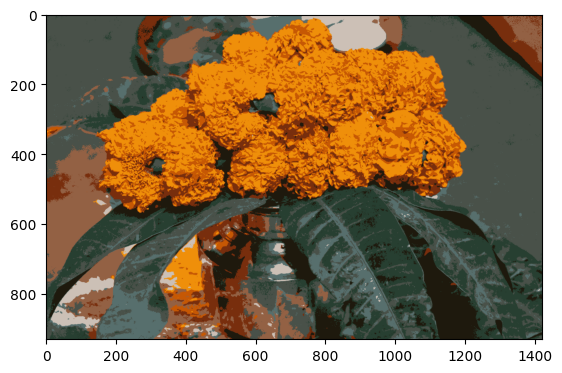

In [ ]:
img = color_quantization(img,k=9)
plt.imshow(img)
plt.show()


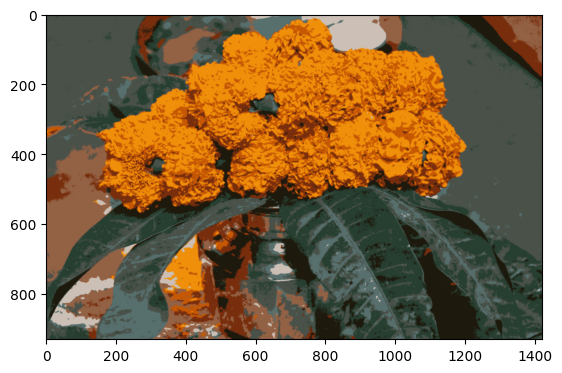

In [ ]:
#Reduce the noise
#d is diameter of the pixel 
blurred=cv2.bilateralFilter(img,d=3,sigmaColor=200,sigmaSpace=200)

plt.imshow(blurred)
plt.show()

# Combine Edge Mask with Quantiz image

In [38]:
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.show()

    plt.imshow(org_img)
    plt.title("org_img")
    plt.show()
    return c

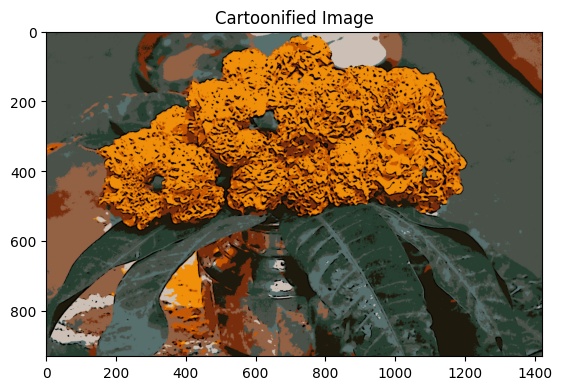

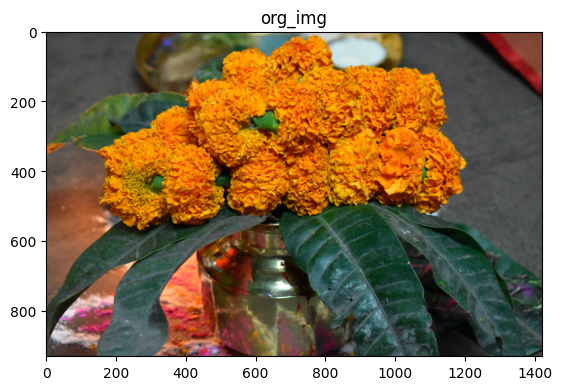

True

In [39]:
output=cartoon()
cv2.imwrite("./cartoon.jpg", output)
#have to try line thicknesses,k values,diameter d values for perfect cartoon image